In [37]:
#import libraries

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from fastcluster import linkage
import seaborn as sns
import scipy.cluster.hierarchy as sch
from matplotlib import cm
import plotly.figure_factory as ff
from scipy.spatial import ConvexHull
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import glob
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
import numpy as np

In [38]:
# set paths to folders containing CSV files
path1 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_po1.csv"
path2 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pdmp1.csv"
path3 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pin1.csv"

all_files = [path1, path2, path3]
dfs = []

for filename in all_files:
    with open(filename, 'r') as f:
        csv_string = f.read()

    data = csv_string
    df = pd.DataFrame([x.split(',') for x in data.split('\n')])
    df.drop(df.tail(1).index,inplace=True)
    dfs.append(df)

df_combined1, df_combined2, df_combined3 = dfs[0], dfs[1], dfs[2]

# process dataframe 1
df1 = df_combined1.rename(columns={0: 'Fault'})
df1 = df1.astype(float)

mincol1 = df1.count(axis=1)
min_elements1 = mincol1.min()
df1 = df1.iloc[:, :min_elements1]

# process dataframe 2
df2 = df_combined2.rename(columns={0: 'Fault'})
df2 = df2.astype(float)

mincol2 = df2.count(axis=1)
min_elements2 = mincol2.min()
df2 = df2.iloc[:, :min_elements2]

# process dataframe 3
df3 = df_combined3.rename(columns={0: 'Fault'})
df3 = df3.astype(float)

mincol3 = df3.count(axis=1)
min_elements3 = mincol3.min()
df3 = df3.iloc[:, :min_elements3]

In [39]:
# Assign Fault label to new df y_true

y_true1 = df1["Fault"]
y_true2 = df2["Fault"]
y_true3 = df3["Fault"]

In [40]:
# del fault label column 

df1.columns = df1.columns.astype(str)
del df1[df1.columns[0]]

df2.columns = df2.columns.astype(str)
del df2[df2.columns[0]]

df3.columns = df3.columns.astype(str)
del df3[df3.columns[0]]

In [41]:
# Perform PCA on the data

pca1 = PCA(n_components=2)
principal_components1 = pca1.fit_transform(df1)

pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(df2)

pca3 = PCA(n_components=2)
principal_components3 = pca3.fit_transform(df3)

In [42]:
# Create a DataFrame df_pca with the principal components and cluster labels

df_pca1 = pd.DataFrame(data=principal_components1, columns=['PC1', 'PC2'], index=df1.index)

df_pca2 = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2'], index=df2.index)

df_pca3 = pd.DataFrame(data=principal_components3, columns=['PC1', 'PC2'], index=df3.index)

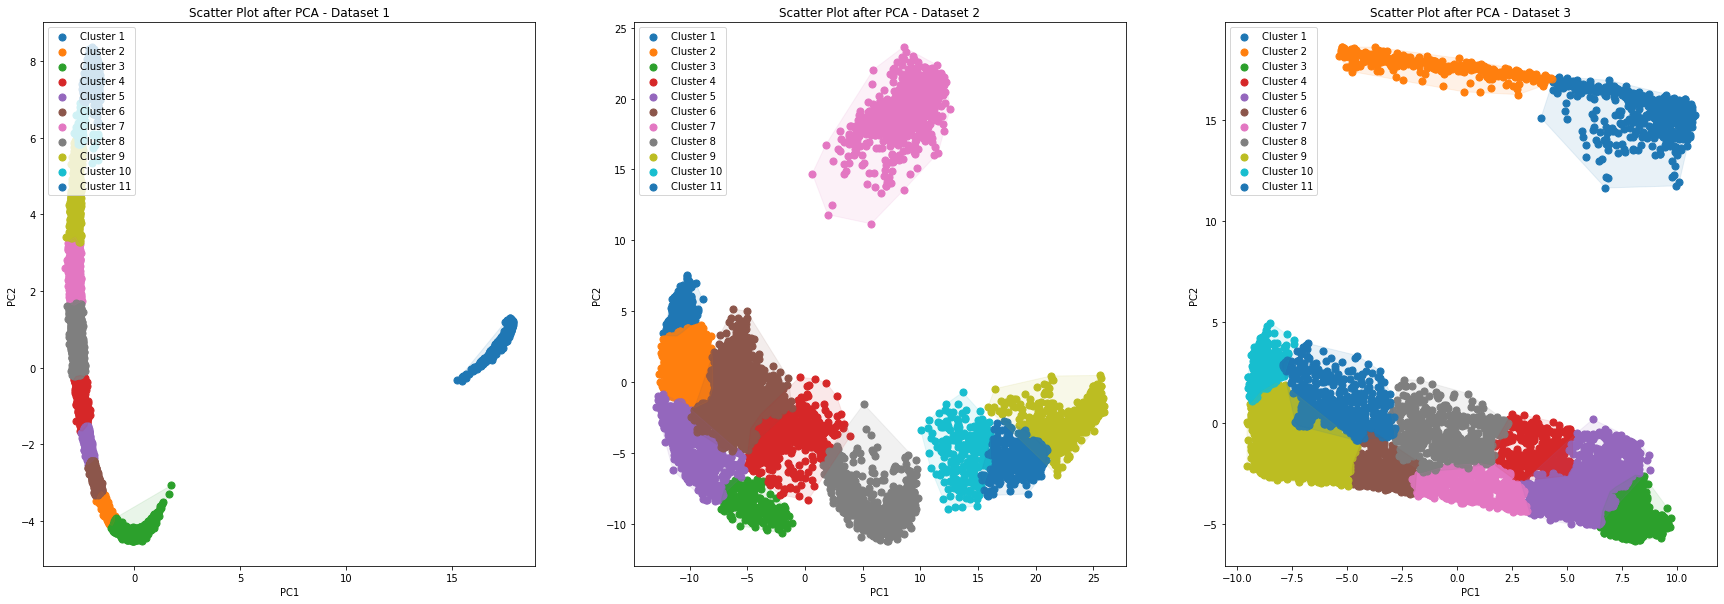

In [43]:
def plot_clusters(df_list, num_clusters=11):
    # Create a list of unique colors for each cluster
    colors = sns.color_palette('tab10', num_clusters)

    fig, axs = plt.subplots(1, len(df_list), figsize=(10*len(df_list), 10))

    # Create a separate scatter plot for each dataframe
    for j, df in enumerate(df_list):
        linkage_matrix = linkage(df[['PC1', 'PC2']], method='ward')
        cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
        df['cluster'] = cluster_labels
        for i in range(num_clusters):
            axs[j].scatter(df.loc[df['cluster']==i+1, 'PC1'], df.loc[df['cluster']==i+1, 'PC2'], color=colors[i], s=50, label=f'Cluster {i+1}')
        axs[j].set_title(f'Scatter Plot after PCA - Dataset {j+1}')
        axs[j].set_xlabel('PC1')
        axs[j].set_ylabel('PC2')
        axs[j].legend(loc='upper left')

        # Draw convex hulls
        for i in range(np.unique(cluster_labels).shape[0]):
            cluster_points = df.loc[cluster_labels==i+1, ['PC1', 'PC2']]
            hull = ConvexHull(cluster_points)
            axs[j].fill(cluster_points.iloc[hull.vertices, 0], cluster_points.iloc[hull.vertices, 1], color=colors[i], alpha=0.1)

    plt.show()


# Example usage with three dataframes df1, df2, df3:
plot_clusters([df_pca1, df_pca2, df_pca3], num_clusters=11)


In [44]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true1, df_pca1["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   1    2    3    4    5    6    7    8    9    10   11
Fault                                                         
1.0        0   82   41  138   95   92   64  126    9    0    0
2.0      745    0    0    0    0    0    0    0    0    0    0
3.0        0    0    0   12    0    0  111   85  228  128   82
4.0        0  141  208   78   83  100    3   44    0    0    0
5.0        0   71   12  150   82   86   71  141   31    0    0
6.0        0    0    0    0    0    0    0    0   11   52  576
7.0        0  155  357    6   25  124    0    1    0    0    0
8.0        0  142   81  122   95  109   15   92    0    0    0
9.0        0    9    0   96   75   27  127  153  146    7    0
10.0       0  146  173   94   86  118    2   52    0    0    0
11.0       0   56    1  123  105   82  117  168   45    1    0


In [45]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true2, df_pca2["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   1    2    3    4    5    6    7    8    9    10   11
Fault                                                         
1.0        0   34  207   12  388    6    0    0    0    0    0
2.0        0    0    0    0    0    0  745    0    0    0    0
3.0        0    3    2  190    1  446    0    4    0    0    0
4.0        0    0    0    0    0    0    0    0  200  231  226
5.0       52  320    5   48   24  195    0    0    0    0    0
6.0        0    0    0    0    0    0    0    0  462    1  176
7.0      150  242   13    4   84  175    0    0    0    0    0
8.0       80  204   18  125   40  189    0    0    0    0    0
9.0        0    0    0   67    0    0    0  573    0    0    0
10.0      29  319    0  108    4  211    0    0    0    0    0
11.0     159  246    0   36    0  257    0    0    0    0    0


In [46]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true3, df_pca3["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   1    2    3    4    5   6   7    8    9    10   11
Fault                                                       
1.0        0    0  103    1   73  56  92    5  305    4    8
2.0      463  282    0    0    0   0   0    0    0    0    0
3.0        0    0   32   48  141  59  38   37  291    0    0
4.0        0    0  168   13   88  27  68   42  127   73   51
5.0        0    0  102    0   70  56  99    0  316    0    1
6.0        0    0    1   66  119   9   0  104  235    0  105
7.0        0    0   50   65  221   0   0   94    3  116  119
8.0        0    0  168   36  204  10  26   84   48    4   76
9.0        0    0  145    3   99  66  97    0  230    0    0
10.0       0    0  188   18   73  31  53   39  174   49   46
11.0       0    0    0  101  213   7   0   96   59    0  222
